# SLA Breach Prediction

### Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Reading the dataset

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Id,DocumentId,SlaMoment,NumberPages,SugestedDocumentClass,RequestedHumanRevision,QualityControl,CustomerName,EntityName,DocumentMonitorId,FinishedAt,time_diff,DocumentMonitorId.1,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML
0,109524,7c1a7831-96a0-4297-9c96-d2dcf296f294,2021-10-01 15:55:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109524,2021-10-01 09:15:14.323,400.0,109524,2,6,0,4,0,6
1,109525,74497e9e-3e13-4a55-b4fc-5dd36621031f,2021-10-01 15:56:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109525,2021-10-01 09:14:58.640,402.0,109525,2,6,0,4,0,6
2,109526,51816260-f5cd-45fd-af8c-6dec8184b533,2021-10-01 15:58:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109526,2021-10-01 09:16:41.790,402.0,109526,2,6,0,4,0,6
3,109527,002a7749-20eb-495f-a655-a839b2e6b2ec,2021-10-01 15:57:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109527,2021-10-01 09:15:14.450,402.0,109527,2,6,0,4,1,5
4,109528,06bda106-5afe-4ae3-88b7-1a11eb7e7bd5,2021-10-01 15:59:00.000,1,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109528,2021-10-01 09:16:05.117,403.0,109528,1,6,0,2,0,6


### Manipulating dataset

In [4]:
df['breach'] = np.where(df['time_diff'] < 0, 1, 0)
df['breach'].value_counts()

0    34558
1     4113
Name: breach, dtype: int64

In [5]:
df[['doc1', 'doc2']] = df['SugestedDocumentClass'].str.split(',', expand = True)
df['isdoc1'] = np.where(df.doc1.isnull(), 0, 1)
df['isdoc2'] = np.where(df.doc2.isnull(), 0, 1)
df['HasMultipleDocumentClass'] = df['isdoc1'] + df['isdoc2']
df.head()

,Id,DocumentId,SlaMoment,NumberPages,SugestedDocumentClass,RequestedHumanRevision,QualityControl,CustomerName,EntityName,DocumentMonitorId,...,pfd_topdown,pfd_poised,sfv_human,sfv_ML,breach,doc1,doc2,isdoc1,isdoc2,HasMultipleDocumentClass
0,109524,7c1a7831-96a0-4297-9c96-d2dcf296f294,2021-10-01 15:55:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109524,...,0,4,0,6,0,dni_front,dni_back,1,1,2
1,109525,74497e9e-3e13-4a55-b4fc-5dd36621031f,2021-10-01 15:56:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109525,...,0,4,0,6,0,dni_front,dni_back,1,1,2
2,109526,51816260-f5cd-45fd-af8c-6dec8184b533,2021-10-01 15:58:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109526,...,0,4,0,6,0,dni_front,dni_back,1,1,2
3,109527,002a7749-20eb-495f-a655-a839b2e6b2ec,2021-10-01 15:57:00.000,2,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109527,...,0,4,1,5,0,dni_front,dni_back,1,1,2
4,109528,06bda106-5afe-4ae3-88b7-1a11eb7e7bd5,2021-10-01 15:59:00.000,1,"dni_front,dni_back",1,0,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3,109528,...,0,2,0,6,0,dni_front,dni_back,1,1,2


In [6]:
df['EntityName'].value_counts()

Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3    21256
Anonymized 11E47A74-96BC-4C87-ADC8-395247A200B8     9783
Anonymized 49428E4C-BA4E-4BAA-B6BA-529CFE4F1D15     2518
Anonymized A48AA76F-A152-491F-A81F-00C31C604153     2040
Anonymized 1A36E27A-D787-4CF4-872E-31E4FC7E5C01     1055
Anonymized 7400E96B-C461-4EC2-B097-CF0BCCEEA164      973
Anonymized 64A2D261-CFA0-4B57-BBF8-542FD2236F21      337
Anonymized 27CE39D3-C4A5-486E-8EAC-2671FB128CFC      304
Anonymized D2A6CA74-7937-48E4-B8EB-C51880B912BA      188
Anonymized 8C7A49F3-AC1F-49BA-8B4A-6472A4211D4E      118
Anonymized 7483B274-A481-4BBB-97C1-E99E74FA7669       45
Anonymized ED4AE7ED-9B5C-455B-9EED-7FE918F46423       33
Anonymized B53A8FF3-52F9-4378-B13E-573CF9BC3471       13
Anonymized 643914C6-45A3-4D12-A2FA-63EF042D57EF        3
Anonymized E2EFBAB6-F238-4A49-AC1F-7A07CBBDCF33        2
Anonymized 3CBCB459-DAA7-4B18-B1A6-C0F7FB5A899E        2
Anonymized FB65ABCB-ADE7-4C63-962F-1557B53ADC42        1
Name: EntityName, dtype: int64

In [7]:
df['EntityName'] = np.where(df['EntityName'] == 'Anonymized 0AEB069F-A0F3-4B64-BA3D-83228E071AF3', 'ent1', 
         np.where(df['EntityName'] == 'Anonymized 11E47A74-96BC-4C87-ADC8-395247A200B8', 'ent2', 
                 np.where(df['EntityName'] == 'Anonymized 49428E4C-BA4E-4BAA-B6BA-529CFE4F1D15', 'ent3', 'ent4')))

In [8]:
df = df.drop(['Id', 'DocumentId', 'DocumentMonitorId', 'FinishedAt', 'SlaMoment', 'time_diff', 'SugestedDocumentClass', 
              'doc1', 'doc2', 'isdoc1', 'isdoc2', 'CustomerName', 'DocumentMonitorId.1'], 1)
df.head()

,NumberPages,RequestedHumanRevision,QualityControl,EntityName,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,breach,HasMultipleDocumentClass
0,2,1,0,ent1,2,6,0,4,0,6,0,2
1,2,1,0,ent1,2,6,0,4,0,6,0,2
2,2,1,0,ent1,2,6,0,4,0,6,0,2
3,2,1,0,ent1,2,6,0,4,1,5,0,2
4,1,1,0,ent1,1,6,0,2,0,6,0,2


Check unique value in each column of dataframe

In [9]:
model_df = pd.get_dummies(df)
model_df.head()

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,breach,HasMultipleDocumentClass,EntityName_ent1,EntityName_ent2,EntityName_ent3,EntityName_ent4
0,2,1,0,2,6,0,4,0,6,0,2,1,0,0,0
1,2,1,0,2,6,0,4,0,6,0,2,1,0,0,0
2,2,1,0,2,6,0,4,0,6,0,2,1,0,0,0
3,2,1,0,2,6,0,4,1,5,0,2,1,0,0,0
4,1,1,0,1,6,0,2,0,6,0,2,1,0,0,0


In [10]:
corrM = model_df.corr()
corrM
# plot for EDA

,NumberPages,RequestedHumanRevision,QualityControl,pf_human,efv,pfd_topdown,pfd_poised,sfv_human,sfv_ML,breach,HasMultipleDocumentClass,EntityName_ent1,EntityName_ent2,EntityName_ent3,EntityName_ent4
NumberPages,1.000000,0.041787,-0.041787,1.000000,0.584055,0.378552,0.391610,0.461286,0.392114,0.018687,0.117683,0.103416,-0.058451,-0.040820,-0.047147
RequestedHumanRevision,0.041787,1.000000,-1.000000,0.041787,0.022896,-0.039800,0.221098,-0.001687,0.058666,-0.046008,0.276657,0.293849,0.154783,-0.992225,0.092463
QualityControl,-0.041787,-1.000000,1.000000,-0.041787,-0.022896,0.039800,-0.221098,0.001687,-0.058666,0.046008,-0.276657,-0.293849,-0.154783,0.992225,-0.092463
pf_human,1.000000,0.041787,-0.041787,1.000000,0.584055,0.378552,0.391610,0.461286,0.392114,0.018687,0.117683,0.103416,-0.058451,-0.040820,-0.047147
efv,0.584055,0.022896,-0.022896,0.584055,1.000000,0.244241,0.200392,0.917147,0.281393,0.037166,0.065829,0.051831,-0.050058,-0.022112,0.004220
pfd_topdown,0.378552,-0.039800,0.039800,0.378552,0.244241,1.000000,0.027162,0.250327,0.033860,0.181012,-0.208771,-0.211676,0.108970,0.040766,0.141356
pfd_poised,0.391610,0.221098,-0.221098,0.391610,0.200392,0.027162,1.000000,-0.033919,0.743049,-0.027863,0.625620,0.558925,-0.278405,-0.219380,-0.303835
sfv_human,0.461286,-0.001687,0.001687,0.461286,0.917147,0.250327,-0.033919,1.000000,-0.034840,0.030814,-0.055151,-0.048469,-0.015502,0.001883,0.089709
sfv_ML,0.392114,0.058666,-0.058666,0.392114,0.281393,0.033860,0.743049,-0.034840,1.000000,0.001241,0.387923,0.294579,-0.134511,-0.057312,-0.218288
breach,0.018687,-0.046008,0.046008,0.018687,0.037166,0.181012,-0.027863,0.030814,0.001241,1.000000,-0.229895,-0.263970,0.304950,0.047659,-0.038359


### Test train split

In [14]:
X = model_df.drop(['breach'], axis = 1)
y = model_df['breach']

feature_names = X.columns

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

<AxesSubplot:>

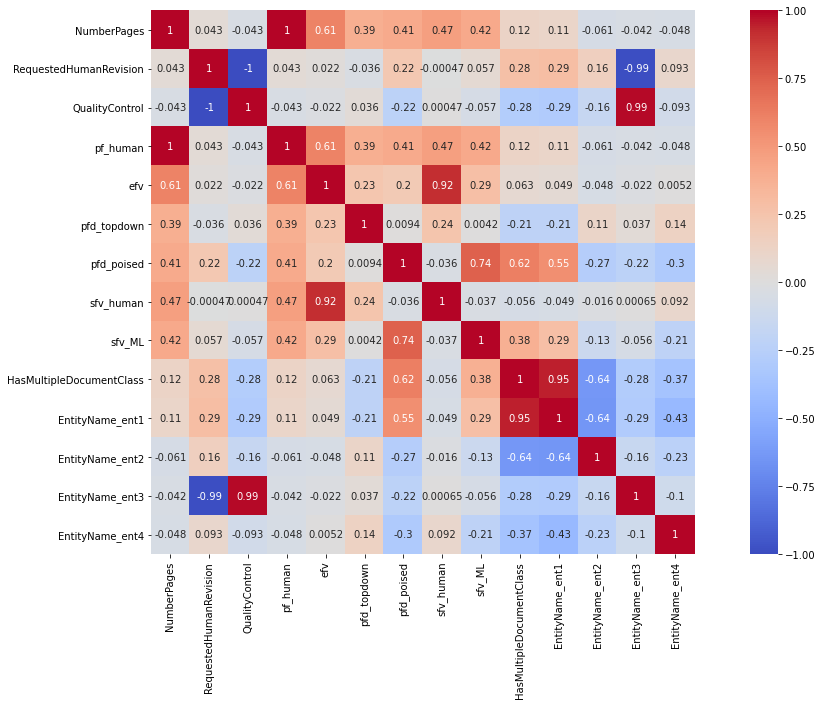

In [16]:
# Correlation Plot
import seaborn as sns
corr_mat=X_train.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='coolwarm')

### Model Building and Validation

#### Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Jessica Shah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_train_pred = logreg.predict(X_train)
print(f'Accuracy Score: {accuracy_score(y_train, y_train_pred)}')

Accuracy Score: 0.8967822970926151


In [19]:
Logistic_train_acc=accuracy_score(y_train,y_train_pred) 
Logistic_train_acc

0.8967822970926151

In [20]:
y_test_pred = logreg.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')

Accuracy Score: 0.8980348215824858


In [21]:
Logistic_test_acc=accuracy_score(y_test,y_test_pred) 
Logistic_test_acc

0.8980348215824858

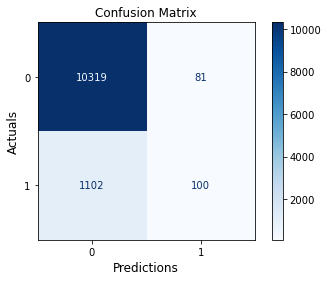

In [22]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues,values_format = '.0f')  
plt.title('Confusion Matrix')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()


In [23]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10400
           1       0.55      0.08      0.14      1202

    accuracy                           0.90     11602
   macro avg       0.73      0.54      0.55     11602
weighted avg       0.87      0.90      0.86     11602





<AxesSubplot:title={'center':'Feature Importance'}>

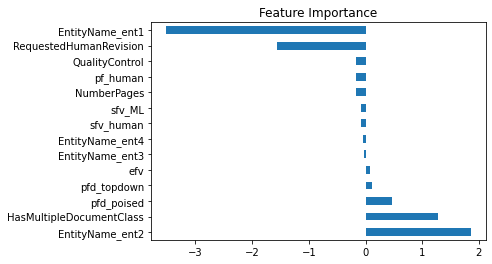

In [105]:

importance = logreg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance,  index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

#### Random Forest

In [24]:
RandomForest_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_train_pred = RandomForest_model.predict(X_train)
print(f'Accuracy Score: {accuracy_score(y_train, y_train_pred)}')

Accuracy Score: 0.9214230300343567


In [26]:
RnF_train_acc=accuracy_score(y_train,y_train_pred) 
RnF_train_acc

0.9214230300343567

In [27]:
y_test_pred = RandomForest_model.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')

Accuracy Score: 0.9076883295983451


In [28]:
RnF_test_acc=accuracy_score(y_test,y_test_pred) 
RnF_test_acc

0.9076883295983451

<AxesSubplot:ylabel='allvarlist'>

<Figure size 1008x1152 with 0 Axes>

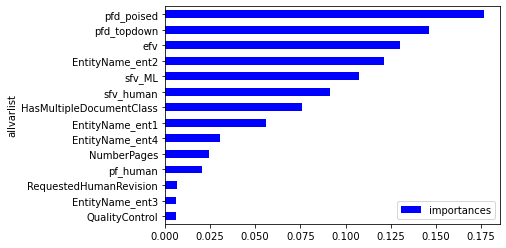

In [29]:
# Feature Importance
plt.figure(figsize=(14,16))
df3=pd.DataFrame({'allvarlist':X_train.columns,'importances':RandomForest_model.feature_importances_})
df3.sort_values('importances',inplace=True)
df3.plot(kind='barh',y='importances',x='allvarlist',color='b')
#plt.barh(X_train.columns, RandomForest_model.feature_importances_)

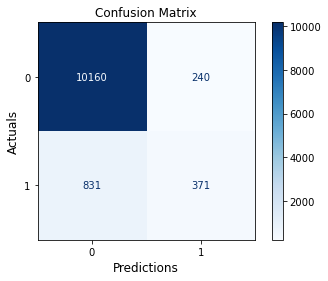

In [30]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForest_model, X_test, y_test, cmap=plt.cm.Blues,values_format = '.0f')  
plt.title('Confusion Matrix')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [31]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10400
           1       0.61      0.31      0.41      1202

    accuracy                           0.91     11602
   macro avg       0.77      0.64      0.68     11602
weighted avg       0.89      0.91      0.89     11602





In [32]:
error = []
# Calculating error for K values between 1 and 40
for i in range(100, 700, 50):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

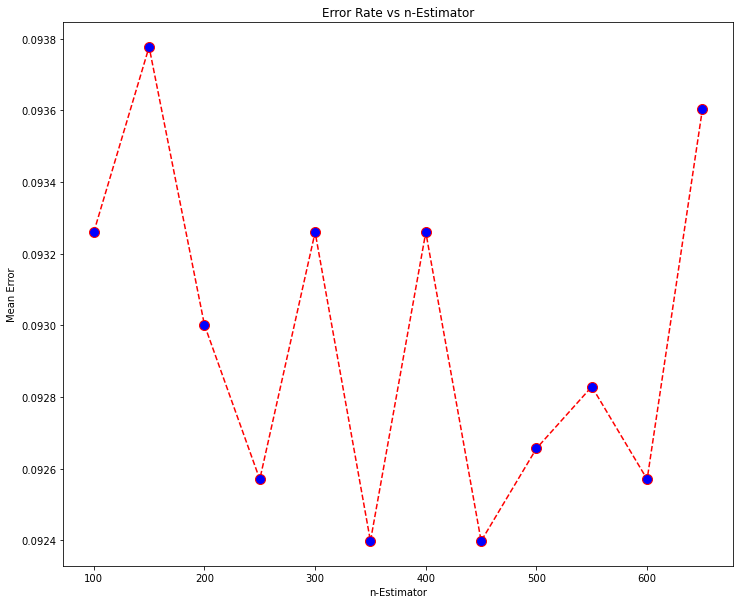

In [33]:

plt.figure(figsize=(12, 10))
plt.plot(range(100, 700, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs n-Estimator')
plt.xlabel('n-Estimator')
plt.ylabel('Mean Error')

#### KNN

In [109]:
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(4, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [110]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [111]:
y_train_knn=knn.predict(X_train)

In [112]:
print(f'Accuracy Score: {accuracy_score(y_train, y_train_knn)}')

Accuracy Score: 0.9090103069932395


In [113]:
Knn_train_acc=accuracy_score(y_train, y_train_knn) 
Knn_train_acc

0.9090103069932395

In [114]:
knn.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=14)

In [115]:
y_test_knn=knn.predict(X_test)

In [116]:
print(f'Accuracy Score: {accuracy_score(y_test, y_test_knn)}')

Accuracy Score: 0.905447336666092


In [117]:
Knn_test_acc=accuracy_score(y_test, y_test_knn) 
Knn_test_acc

0.905447336666092

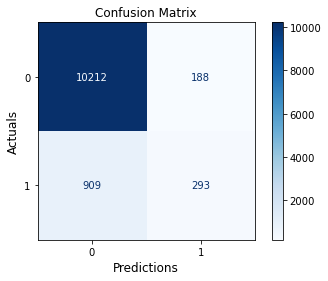

In [118]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues,values_format = '.0f')  
plt.title('Confusion Matrix')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [119]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_knn))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10400
           1       0.61      0.24      0.35      1202

    accuracy                           0.91     11602
   macro avg       0.76      0.61      0.65     11602
weighted avg       0.89      0.91      0.89     11602





#### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=4)

In [51]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [53]:
#Predict the response for test dataset
y_train_pred = clf.predict(X_train)
Dcst_train_acc = accuracy_score(y_train, y_train_pred)
print(f'Accuracy Score: {accuracy_score(y_train, y_train_pred)}')

Accuracy Score: 0.8982230595884592


In [55]:
y_test_pred = clf.predict(X_test)
Dcst_test_acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy Score: {accuracy_score(y_test, y_test_pred)}')                                    

Accuracy Score: 0.9004481985864506


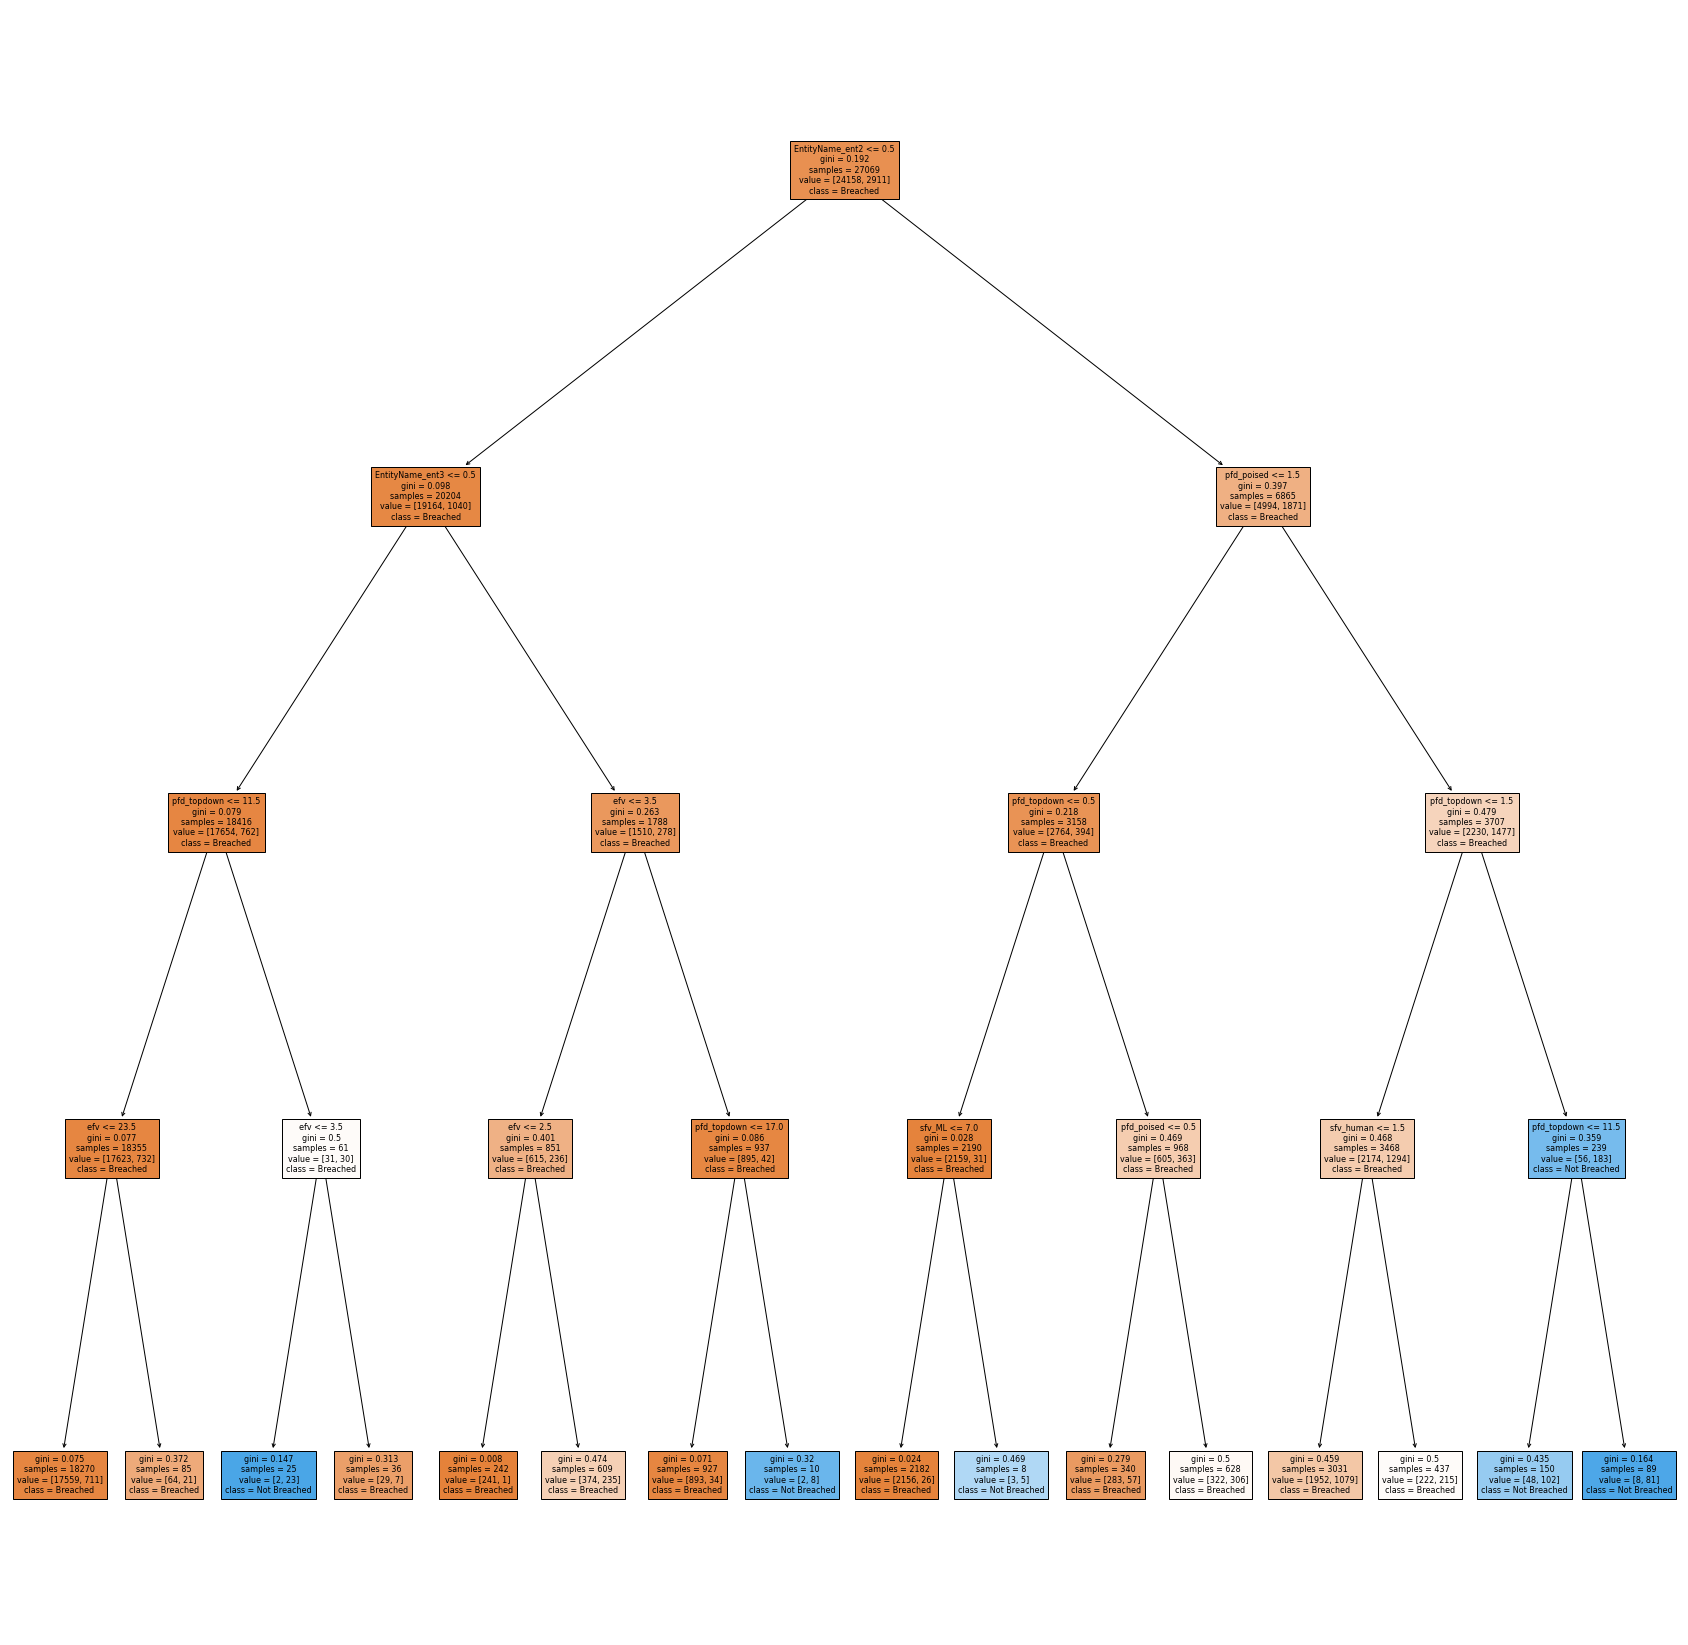

array([0.        , 0.        , 0.        , 0.        , 0.09560275,
       0.22494619, 0.23634876, 0.01111259, 0.00471273, 0.        ,
       0.        , 0.39389912, 0.03337785, 0.        ])

In [56]:
from sklearn import tree
# Plot decision tree
fig, ax = plt.subplots(figsize=(30, 30))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=["Breached","Not Breached"],filled=True,fontsize=8)
plt.show()

importance = clf.feature_importances_
importance

In [58]:
import sklearn.metrics as metrics
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.9004481985864506


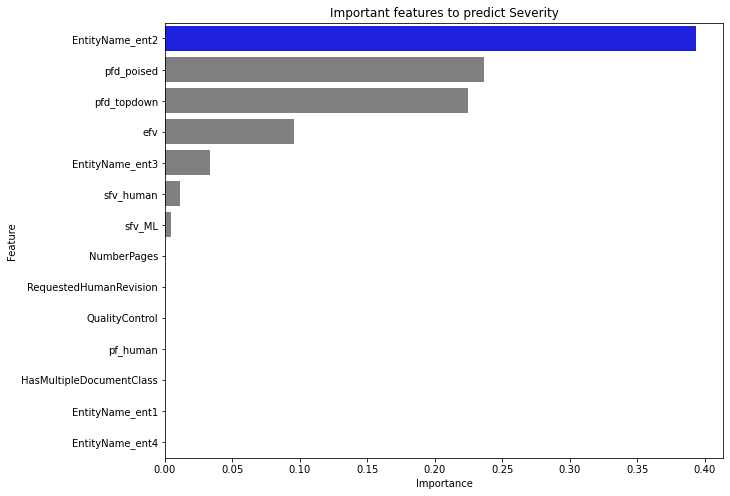

,Feature,Importance
0,EntityName_ent2,0.393899
1,pfd_poised,0.236349
2,pfd_topdown,0.224946
3,efv,0.095603
4,EntityName_ent3,0.033378
5,sfv_human,0.011113
6,sfv_ML,0.004713
7,NumberPages,0.000000
8,RequestedHumanRevision,0.000000
9,QualityControl,0.000000


In [59]:
# Plot to show feature importance
feat_dict= {}
for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
  feat_dict[col]=val
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
clrs = ['grey' if (x < max(values)) else 'blue' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict Severity')
plt.show()
feat_df

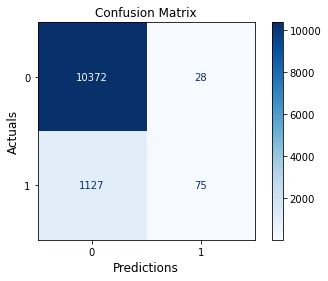

In [60]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Blues,values_format = '.0f')  
plt.title('Confusion Matrix')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [62]:
from sklearn.metrics import classification_report
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10400
           1       0.73      0.06      0.11      1202

    accuracy                           0.90     11602
   macro avg       0.82      0.53      0.53     11602
weighted avg       0.88      0.90      0.86     11602



#### SVM Classifier

In [66]:
################### SVM Classifier ##########################

from sklearn import metrics
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel



In [67]:
#Train the model using the training sets
clf.fit(X_train, y_train) 
#logreg.fit(X_train, y_train)



SVC(kernel='linear')

In [69]:
#Predict the response for test dataset
y_test_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.8970005171522152


In [70]:
SVM_test_acc=accuracy_score(y_test,y_test_pred) 
SVM_test_acc

0.8970005171522152

In [71]:
y_pred_train = clf.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.8937160589604345


In [72]:
SVM_train_acc=accuracy_score(y_train,y_train_pred) 
SVM_train_acc

0.8982230595884592

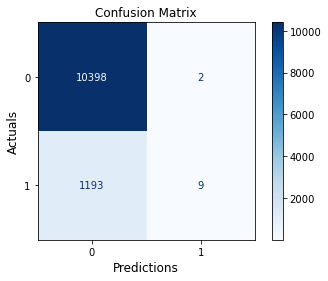

In [73]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Blues,values_format = '.0f')  
plt.title('Confusion Matrix')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

In [74]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     10400
           1       0.82      0.01      0.01      1202

    accuracy                           0.90     11602
   macro avg       0.86      0.50      0.48     11602
weighted avg       0.89      0.90      0.85     11602





In [ ]:
###### Comparing the Accuracies ########

In [75]:
train_acc=[Logistic_train_acc,RnF_train_acc,Knn_train_acc,Dcst_train_acc,SVM_train_acc]
test_acc=[Logistic_test_acc,RnF_test_acc,Knn_test_acc,Dcst_test_acc,SVM_test_acc]



In [76]:
col={'Train Acc':train_acc,'Test Acc':test_acc}
models=['Logistic Regression','Random Forest','Knn','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train Acc,Test Acc
Logistic Regression,0.896782,0.898035
Random Forest,0.921423,0.907688
Knn,0.909010,0.905447
Decision Tree,0.898223,0.900448
SVM,0.898223,0.897001


Text(0.5, 1.0, 'Comparing the model accuracies')

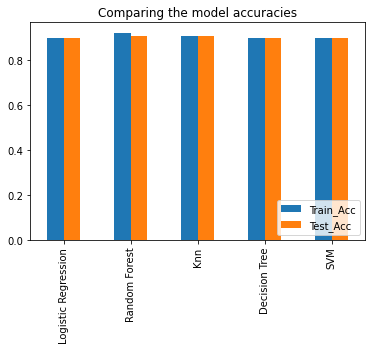

In [92]:
df.plot(kind='bar') 
plt.legend(['Train_Acc', 'Test_Acc'],
            loc='lower right',prop={'size': 10}) 
plt.title('Comparing the model accuracies')